In [2]:
# In canny edge detector there is application of gaussian blur at first stage. Sometimes we have to apply our own blurring
# technique if there is too much noise
# for high resolution images we apply our own custom blur before applying canny edge detector

In [3]:
# it also require user to tell the minimum and maximum thresold which depends on image to image

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def load():
    orig = cv2.imread('data/sammy_face.jpg')
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    global img
    img = orig.copy()
    # not intrested in changing the color as we want to detect only the edges

In [16]:
def imshow(image):
    plt.figure(figsize=(7,7))
    plt.imshow(image, cmap='gray')

In [17]:
load()

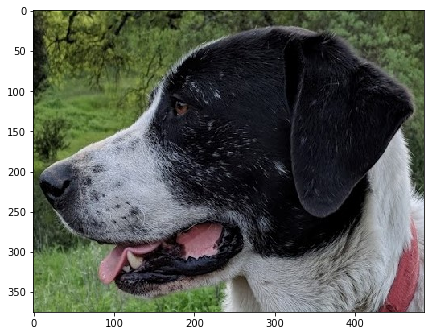

In [18]:
imshow(img)

In [21]:
# we apply blur so that we can remove some of the details of the image that are not required

In [29]:
# to get better edge detection there are 2 formula
#  1. apply custom bkur
#  2. play with different threshold values

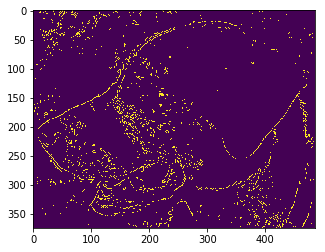

In [44]:
edges = cv2.Canny(image=img, threshold1=255, threshold2=255)
# imshow(edges)
plt.imshow(edges)

**formula or say good starting point for threshold**

In [47]:
med_val = np.median(img)
med_val

64.0

In [46]:
# the image is not so bright even if there is so many colors are intense

In [50]:
# formula
# SET LOWER THRESHOLD TO EITHER 0 OR 70% OF MEDIAN VALUE OF IMAGE WHICH EVER GREATER
lower = int(max(0, 0.7*med_val))
# SET UPPER THRESHOLD TO EITHER 255 OR 130% OF MEDIAN VALUE OF IMAGE WHICH EVER GREATER
upper = int(min(255, 1.3*med_val))

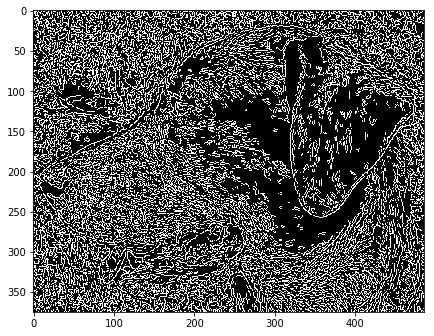

In [51]:
edges = cv2.Canny(img, threshold1=lower, threshold2=upper)
imshow(edges)

In [53]:
upper

83

In [52]:
# above we can see that the it have detected too many edges so we increase the upper limit. As upper limit is only 83 which is 
# very low

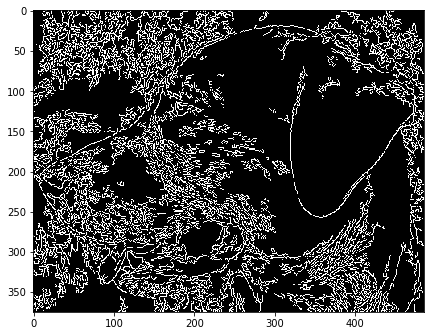

In [61]:
edges = cv2.Canny(img, threshold1=lower, threshold2=upper+200)
imshow(edges)

In [62]:
# again so many edges so apply the blurring

In [100]:
blurred = cv2.blur(img, (4,3))

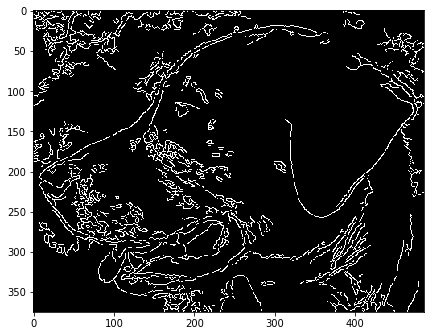

In [102]:
edges = cv2.Canny(blurred, lower, upper+100)
imshow(edges)

In [75]:
# here we have seen edges of dog face without getting too much of noise